# Data Dimensionality
As for tabular data, the first thing to understand is the data dimensionality. In the case of a single time series, it's simple - we are in the presence of one single dimension. But usually, in this context, dimensionality corresponds to the number of observations taken, which corresponds to the length of the series.
So after loading the data, the usual procedure is to plot the data at the most atomic granularity to look for regularities (repetitions) in the data.

In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt
from ts_functions import plot_series, HEIGHT
import ds_charts as ds
from numpy import ones
from pandas import Series
import pandas as pd

%run p00_settings.ipynb

data = read_csv(project_path + data_file, index_col=time_var, sep=r'\s*,\s*', decimal='.', parse_dates=True, infer_datetime_format=True)

print(f'Nr. Records = {data.shape[0]}')
print(f'First date: {data.index[0]}')
print(f'Last date: {data.index[-1]}')


Nr. Records = 11193
First date: 2022-05-20 00:00:00
Last date: 1978-01-03 00:00:00


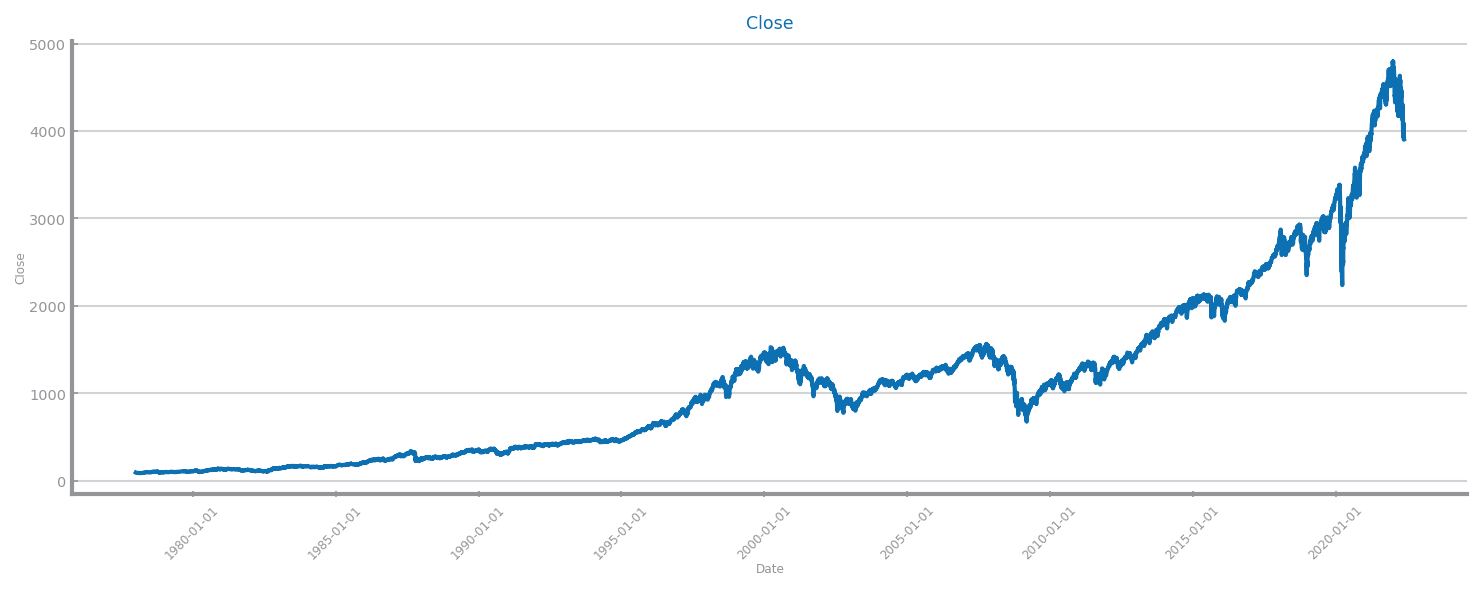

In [2]:
plt.figure(figsize=(3*HEIGHT, HEIGHT))
plot_series(data[target], x_label=time_var, y_label=target, title=target)
plt.xticks(rotation = 45)
plt.show()

The plot shows the PM2.5 particles concentration as an indicator of air polution in Changpin.
There some interesting things we can see from looking at the chart:

- first, there appears to be a cyclic behaviour, with higher concentration of PM2.5 particles in the beggining/end of the year.
- second, the series does not seem stationary, due to its mean varying across time, as variance also seems to vary.
- third, the series seems to present some spikes well spaced out between themselves.

# Data Granularity


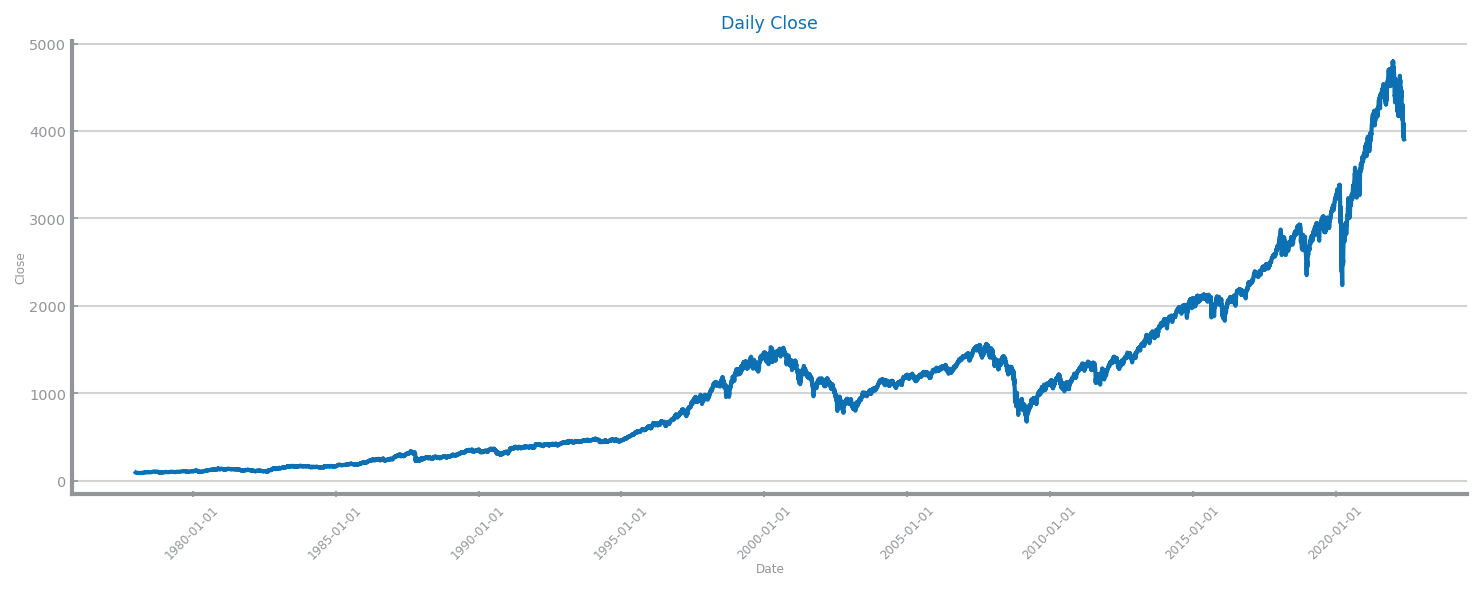

In [3]:
day_df = data.copy().groupby(data.index.date).mean()
plt.figure(figsize=(3*HEIGHT, HEIGHT))
plot_series(day_df[target], title=f'Daily {target}', x_label=time_var, y_label=target)
plt.xticks(rotation = 45)
plt.show()

Aggregating by days, we perform a kind of a smoothing, since we are using the mean as aggregation function. And as a result, we found a smoother version of the original time series, whith less noise.

In this new version, we continue to identify a cyclic behavior, which seems to be shown yearly (according to the seasons).

In [4]:
index = data.index.to_period('W').sort_values(ascending= True)
week_df = data.copy().groupby(index).mean()
week_df

,Open,High,Low,Close
Date,,,,
1978-01-02/1978-01-08,3982.685,4008.020,3908.185,3953.670
1978-01-09/1978-01-15,3981.226,4033.610,3938.750,3979.642
1978-01-16/1978-01-22,4164.166,4203.430,4089.078,4147.420
1978-01-23/1978-01-29,4214.320,4253.358,4142.672,4186.794
1978-01-30/1978-02-05,4398.646,4431.422,4338.460,4376.644
...,...,...,...,...
2022-04-18/2022-04-24,89.686,90.174,89.124,89.686
2022-04-25/2022-05-01,89.028,89.660,88.418,89.028
2022-05-02/2022-05-08,89.932,90.666,89.386,89.932


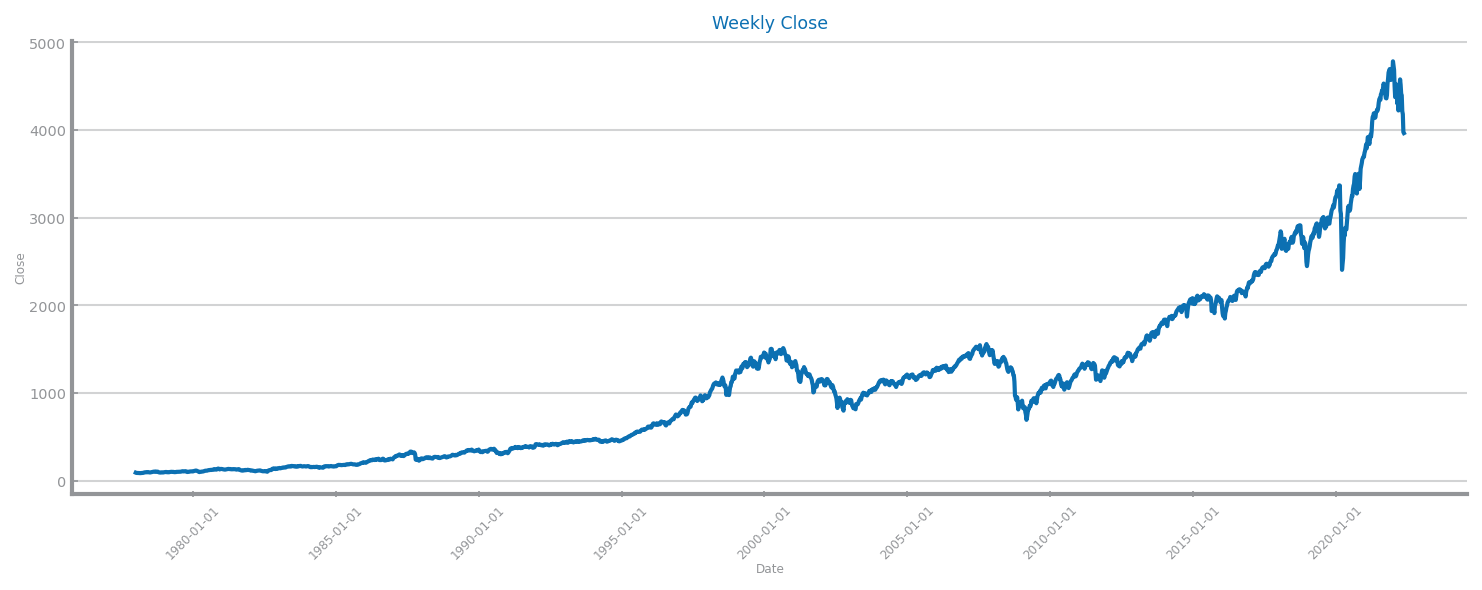

In [5]:
index = data.index.to_period('W')
week_df = data.copy().groupby(index).mean()

week_df['date'] = index.drop_duplicates().to_timestamp().sort_values(ascending=True)
week_df.set_index('date', drop=True, inplace=True)

plt.figure(figsize=(3*HEIGHT, HEIGHT))
plot_series(week_df[target], title=f'Weekly {target}', x_label=time_var, y_label=target)
plt.xticks(rotation = 45)
plt.show()

The chart for weekly PM2.5 concentration seems to be less cyclical and more stationary, although spikes tend to occur still in the begginning of each year.

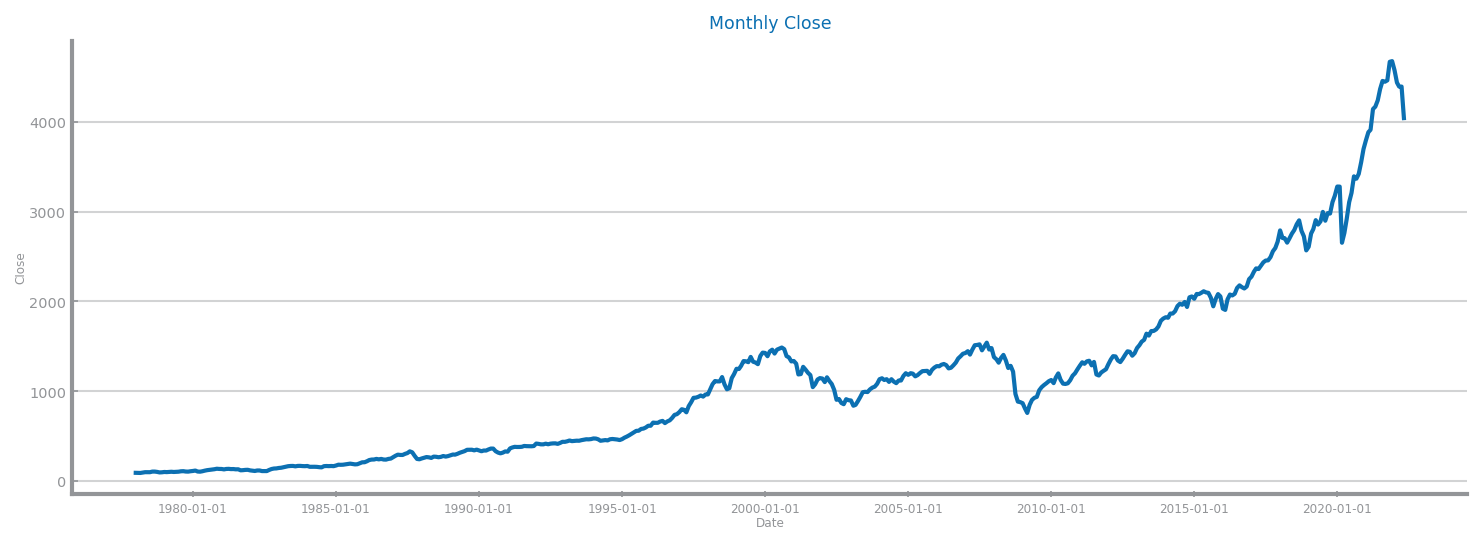

In [6]:
index = data.index.to_period('M')
month_df = data.copy().groupby(index).mean()
month_df['date'] = index.drop_duplicates().to_timestamp().sort_values(ascending=True)
month_df.set_index('date', drop=True, inplace=True)
plt.figure(figsize=(3*HEIGHT, HEIGHT))
plot_series(month_df[target], title=f'Monthly {target}', x_label=time_var, y_label=target)
plt.show()

The series seems now even more stationary, although the spikes are now more spaced out, we still observe more preponderance in the beggining of each year.

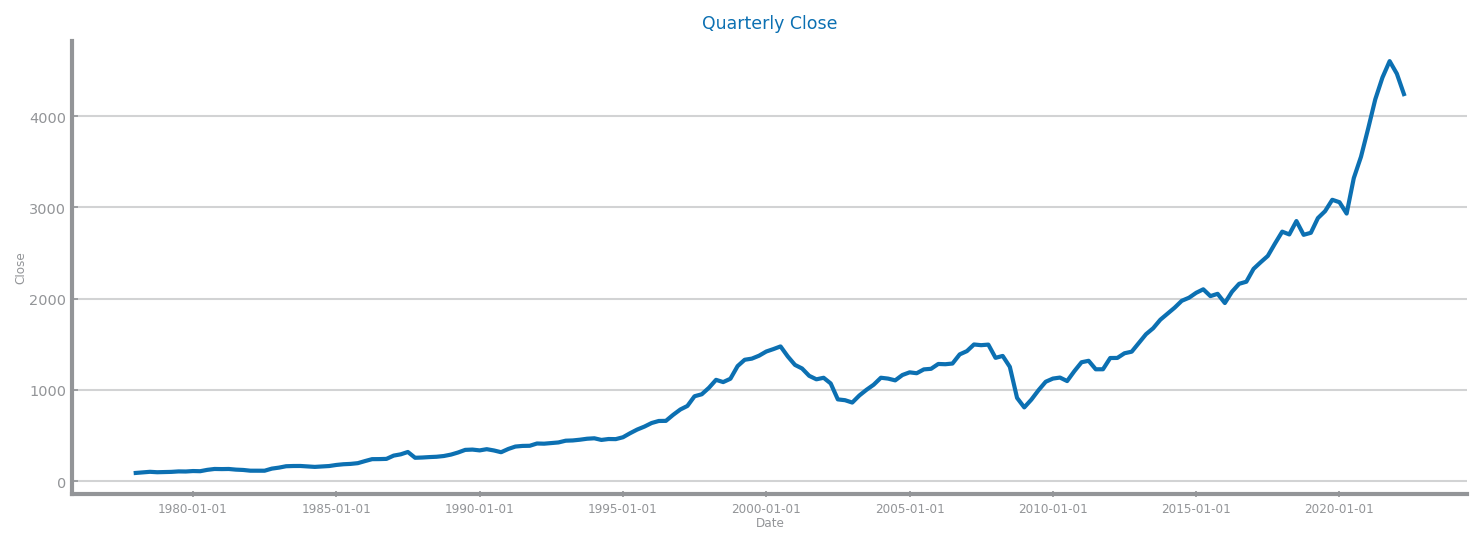

In [7]:
index = data.index.to_period('Q')
quarter_df = data.copy().groupby(index).mean()
quarter_df['date'] = index.drop_duplicates().to_timestamp().sort_values(ascending=True)
quarter_df.set_index('date', drop=True, inplace=True)
plt.figure(figsize=(3*HEIGHT, HEIGHT))
plot_series(quarter_df[target], title=f'Quarterly {target}', x_label=time_var, y_label=target)
plt.show()

We now still observe cyclicality, but not always in the first quarter.

Jointly with the last chart, they confirm any suspicion about the lack of stationarity in the time series. Indeed its mean is not constant along time. In particular we identify very different values of PM2.5 concentration per quarter.

# Data Distribution
Like for tabular data, one of the perspectives of analysis to consider is the distribution of data, in particular the centrality, trends and distribution of the variable. But be aware that the different aggregations may show different distributions.

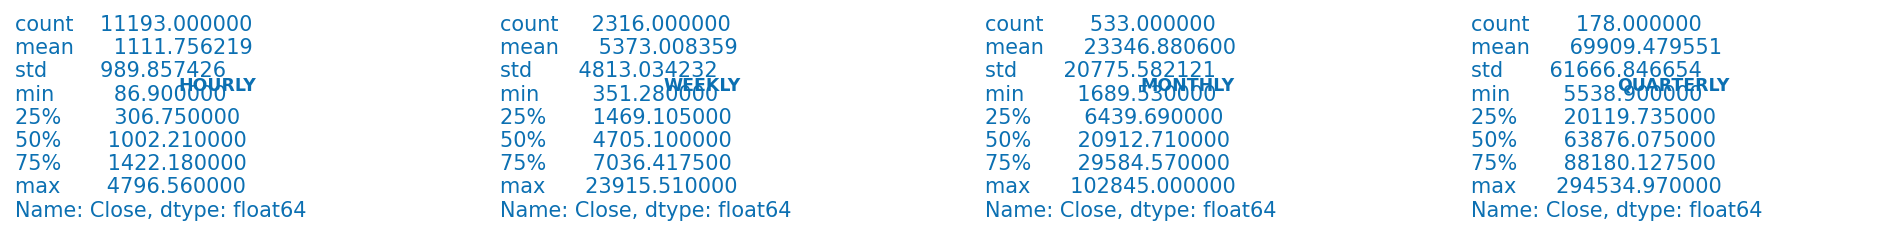

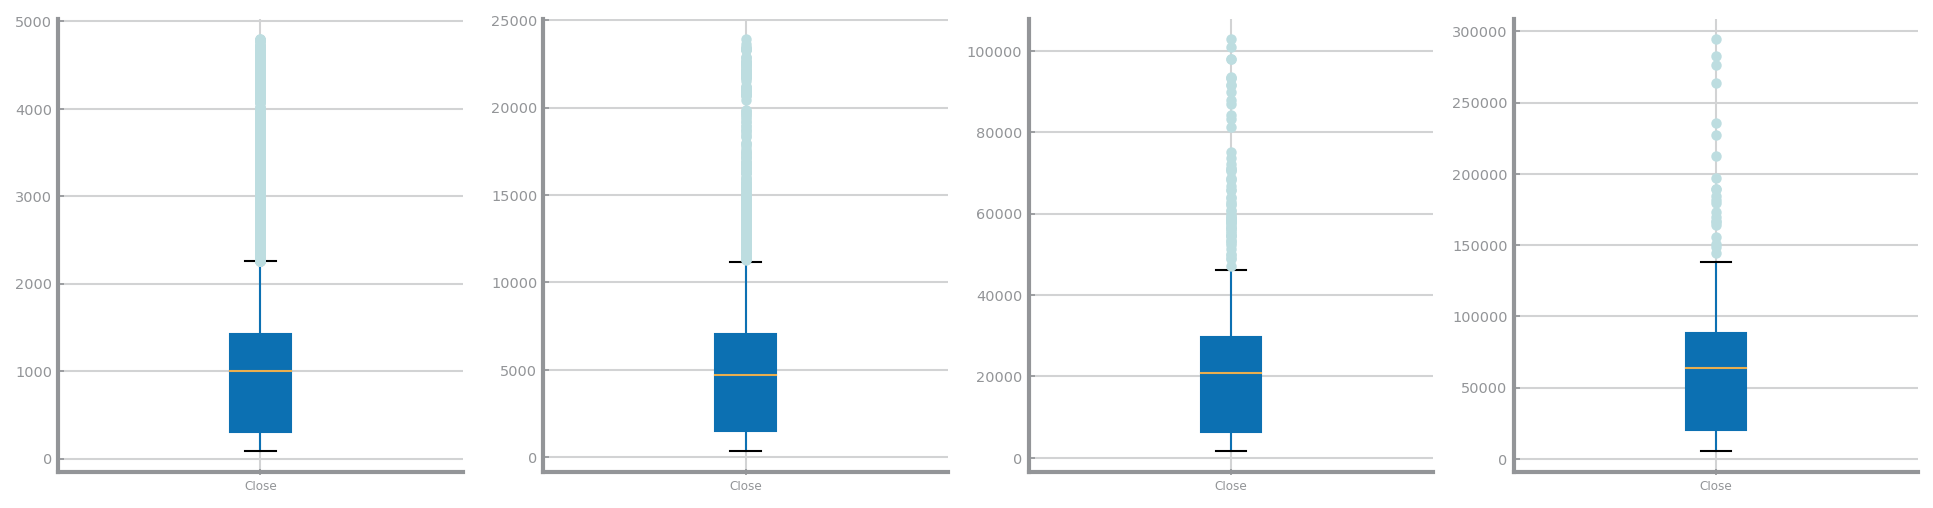

In [8]:
w_index = data.index.to_period('W')
week_df = data.copy().groupby(w_index).sum()
week_df['date'] = w_index.drop_duplicates().to_timestamp().sort_values(ascending=True)
week_df.set_index('date', drop=True, inplace=True)

m_index = data.index.to_period('M')
month_df = data.copy().groupby(m_index).sum()
month_df['date'] = m_index.drop_duplicates().to_timestamp().sort_values(ascending=True)
month_df.set_index('date', drop=True, inplace=True)

q_index = data.index.to_period('Q')
quarter_df = data.copy().groupby(q_index).sum()
quarter_df['date'] = q_index.drop_duplicates().to_timestamp().sort_values(ascending=True)
quarter_df.set_index('date', drop=True, inplace=True)

_, axs = plt.subplots(1, 4, figsize=(4*HEIGHT, HEIGHT/4))

axs[0].grid(False)
axs[0].set_axis_off()
axs[0].set_title('HOURLY', fontweight="bold")
axs[0].text(0, 0, str(data[target].describe()))

axs[1].grid(False)
axs[1].set_axis_off()
axs[1].set_title('WEEKLY', fontweight="bold")
axs[1].text(0, 0, str(week_df[target].describe()))

axs[2].grid(False)
axs[2].set_axis_off()
axs[2].set_title('MONTHLY', fontweight="bold")
axs[2].text(0, 0, str(month_df[target].describe()))

axs[3].grid(False)
axs[3].set_axis_off()
axs[3].set_title('QUARTERLY', fontweight="bold")
axs[3].text(0, 0, str(quarter_df[target].describe()))
plt.show()

_, axs = plt.subplots(1, 4, figsize=(4*HEIGHT, HEIGHT))
data.boxplot(column=target, ax=axs[0])
week_df.boxplot(column=target, ax=axs[1])
month_df.boxplot(column=target, ax=axs[2])
quarter_df.boxplot(column=target, ax=axs[3])
plt.show()

# Variables Distribution
But from this chart is not possible to completely understand the variable distribution. In order to do so, we use histograms:
1. Total stocks histogram (average return per week);
2. Histogram per stock.

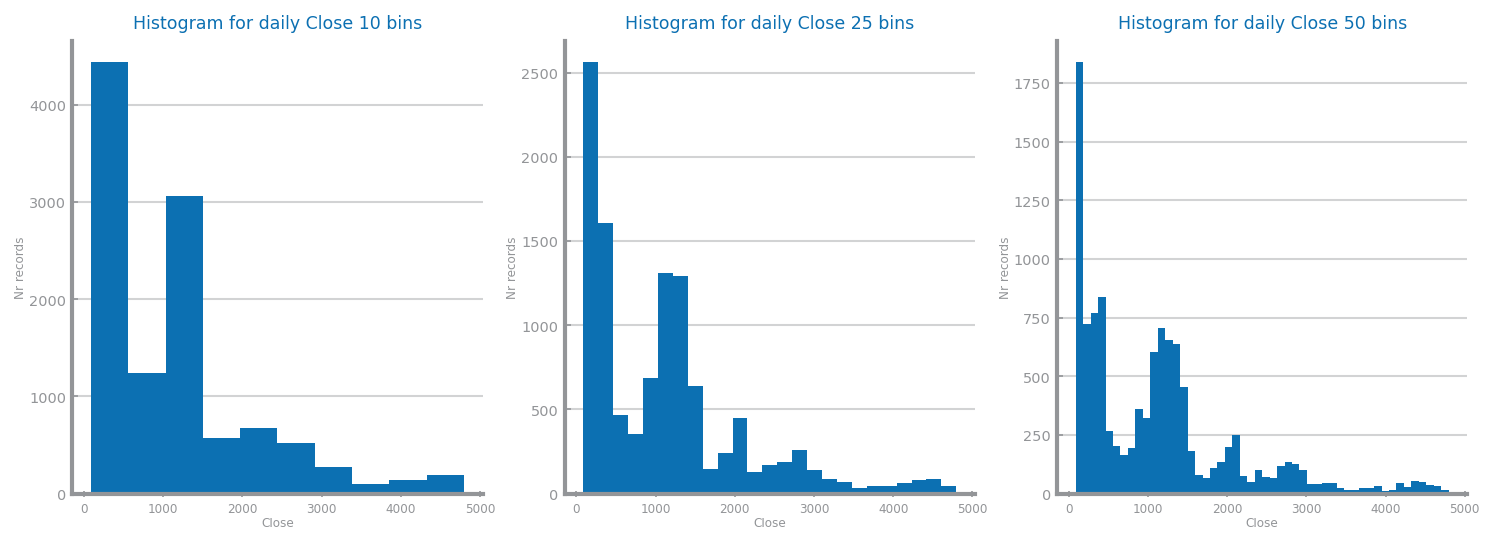

In [9]:
bins = (10, 25, 50)
fig, axs = plt.subplots(1, len(bins), figsize=(len(bins)*HEIGHT, HEIGHT))
for j in range(len(bins)):
  axs[j].set_title(f'Histogram for daily {target} {bins[j]} bins')
  axs[j].set_xlabel(target)
  axs[j].set_ylabel('Nr records')
  axs[j].hist(day_df[target], bins=bins[j])
plt.show()

Looking at the histogram, it is clear that the distribution is not normal, looks more like an exponential one. Let's now take a look at the other granularities:

##### Weekly:

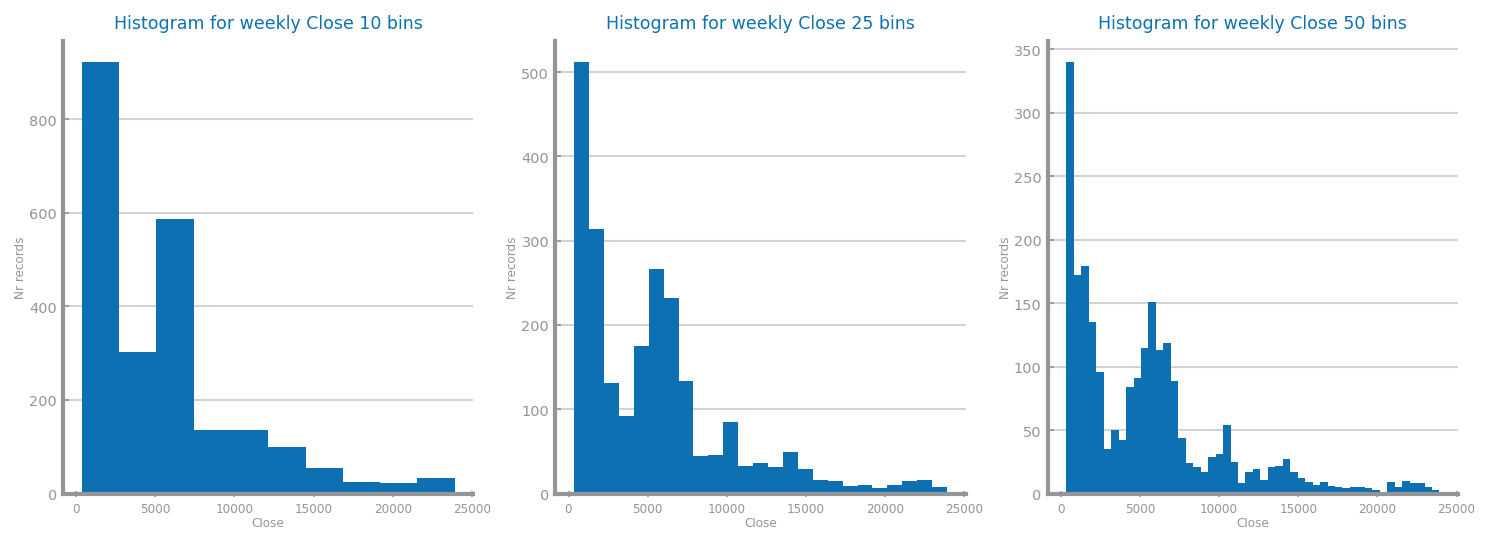

In [10]:
bins = (10, 25, 50)
fig, axs = plt.subplots(1, len(bins), figsize=(len(bins)*HEIGHT, HEIGHT))
for j in range(len(bins)):
  axs[j].set_title(f'Histogram for weekly {target} {bins[j]} bins')
  axs[j].set_xlabel(target)
  axs[j].set_ylabel('Nr records')
  axs[j].hist(week_df[target], bins=bins[j])
plt.show()

##### Monthly:

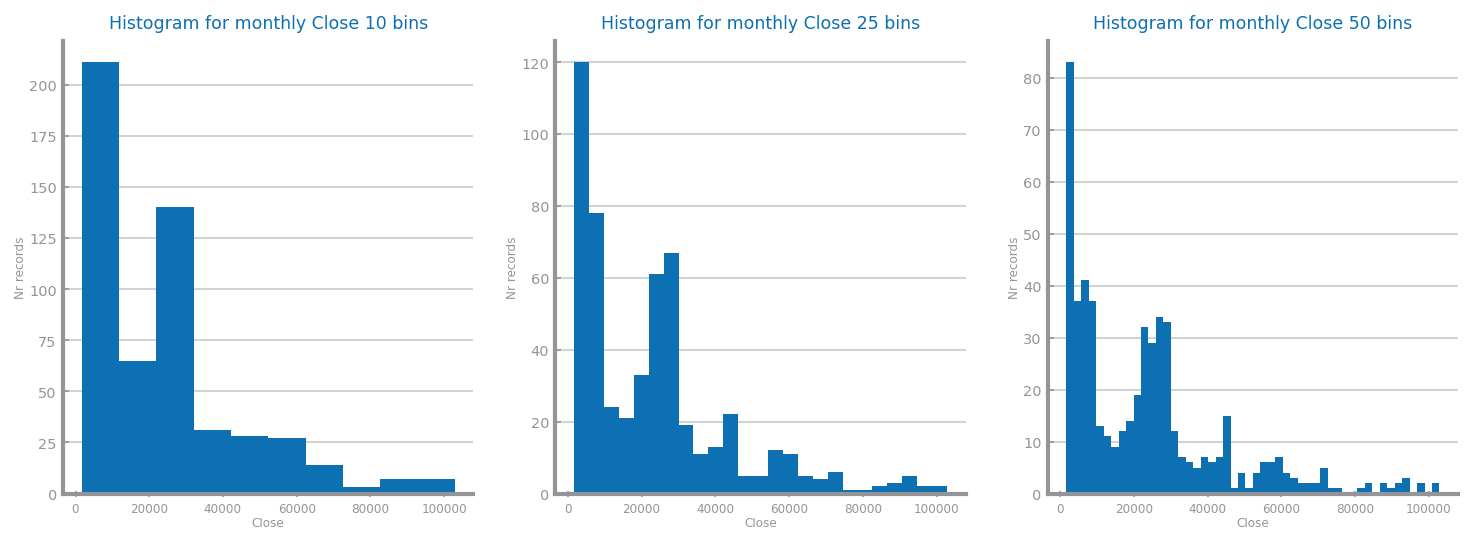

In [11]:
bins = (10, 25, 50)
fig, axs = plt.subplots(1, len(bins), figsize=(len(bins)*HEIGHT, HEIGHT))
for j in range(len(bins)):
  axs[j].set_title(f'Histogram for monthly {target} {bins[j]} bins')
  axs[j].set_xlabel(target)
  axs[j].set_ylabel('Nr records')
  axs[j].hist(month_df[target], bins=bins[j])
plt.show()

##### Quarterly:

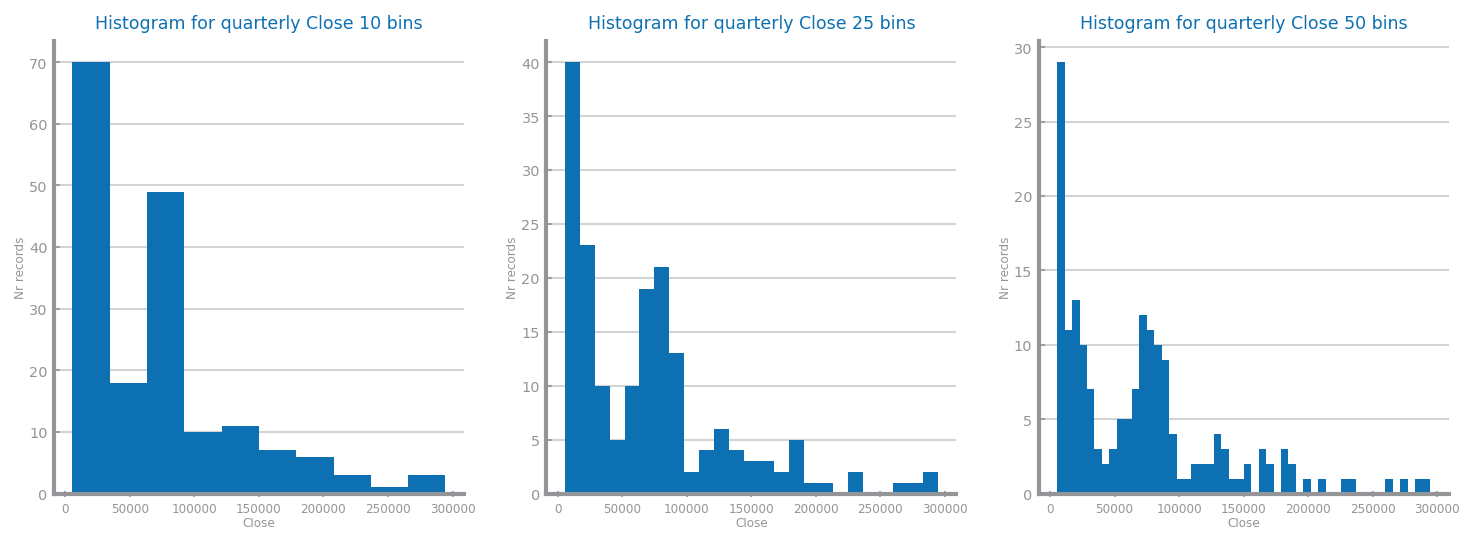

In [12]:
bins = (10, 25, 50)
fig, axs = plt.subplots(1, len(bins), figsize=(len(bins)*HEIGHT, HEIGHT))
for j in range(len(bins)):
  axs[j].set_title(f'Histogram for quarterly {target} {bins[j]} bins')
  axs[j].set_xlabel(target)
  axs[j].set_ylabel('Nr records')
  axs[j].hist(quarter_df[target], bins=bins[j])
plt.show()

Note the importance of creating the histogram for the most adequate data granularity, for the task at hands:
- **Daily:** Still resembles an exponential distribution as the hourly histogram does.
- **Weekly:** resembles a normal distribution, but skewed to lower PM2.5 concentrations (skewed to the left).
- **Monthly:** doesn't resemble any distribution, maybe a uniform one.
- **Quarterly:** uniform distribution (few obs, one per bin)

### Data Stationarity

##### Daily data:

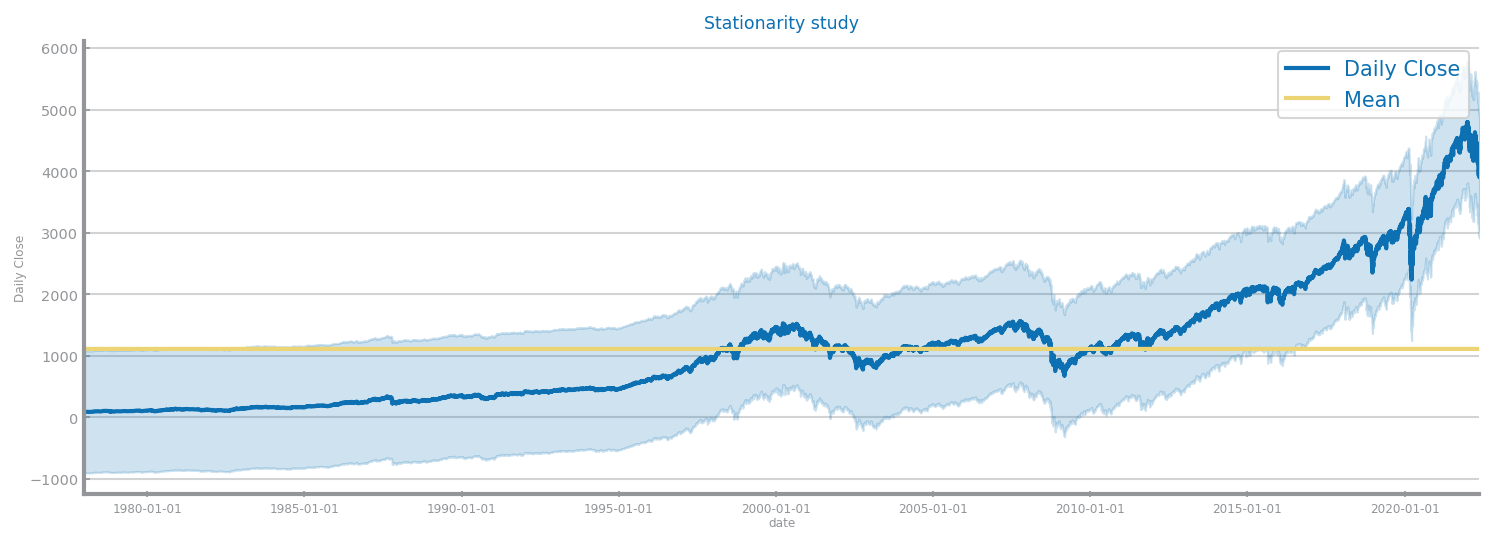

In [13]:
dt_d_series = Series(data[target].groupby(data.index.date).mean())

mean_line = Series(ones(len(dt_d_series.values)) * dt_d_series.mean(), index=dt_d_series.index)
series = {f'Daily {target}': dt_d_series, 'Mean': mean_line}
plt.figure(figsize=(3*HEIGHT, HEIGHT))
plot_series(series, x_label='date', y_label=f'Daily {target}', title='Stationarity study', show_std=True)
plt.show()

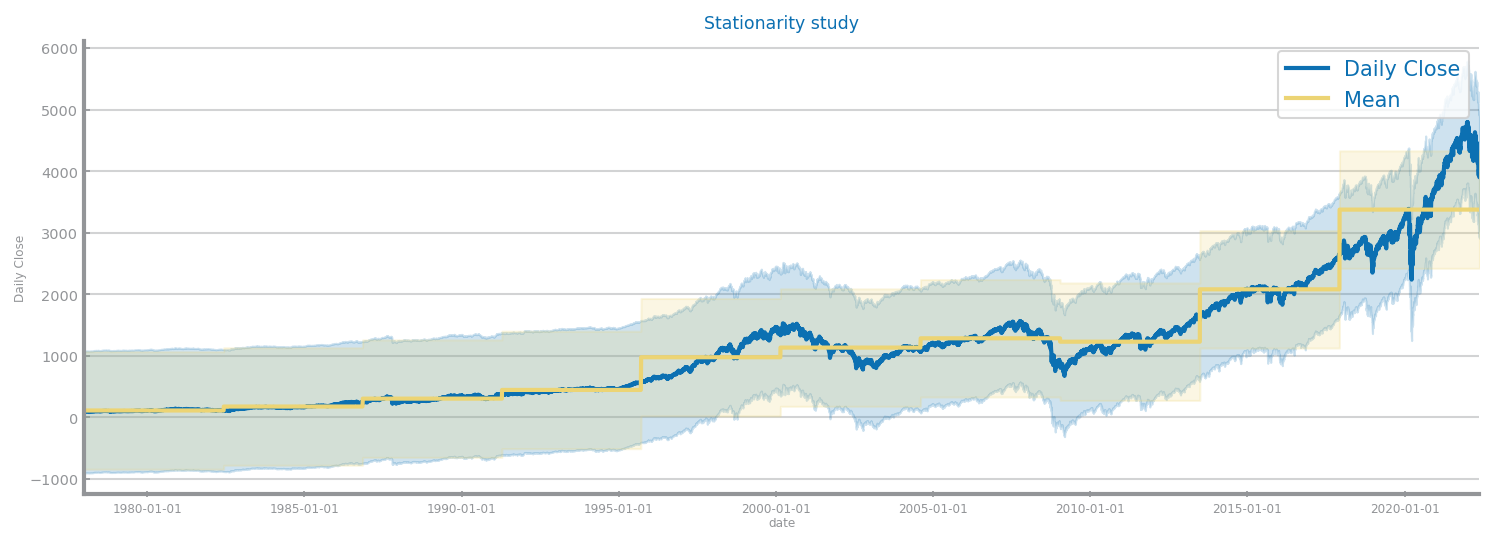

In [14]:
BINS = 10
line = []
n = len(dt_d_series)
for i in range(BINS):
    b = dt_d_series[i*n//BINS:(i+1)*n//BINS]
    mean = [b.mean()] * (n//BINS)
    line += mean
line += [line[-1]] * (n - len(line))
mean_line = Series(line, index=dt_d_series.index)
series = {f'Daily {target}': dt_d_series, 'Mean': mean_line}
plt.figure(figsize=(3*HEIGHT, HEIGHT))
plot_series(series, x_label='date', y_label=f'Daily {target}', title='Stationarity study', show_std=True)
plt.show()

##### Weekly data:

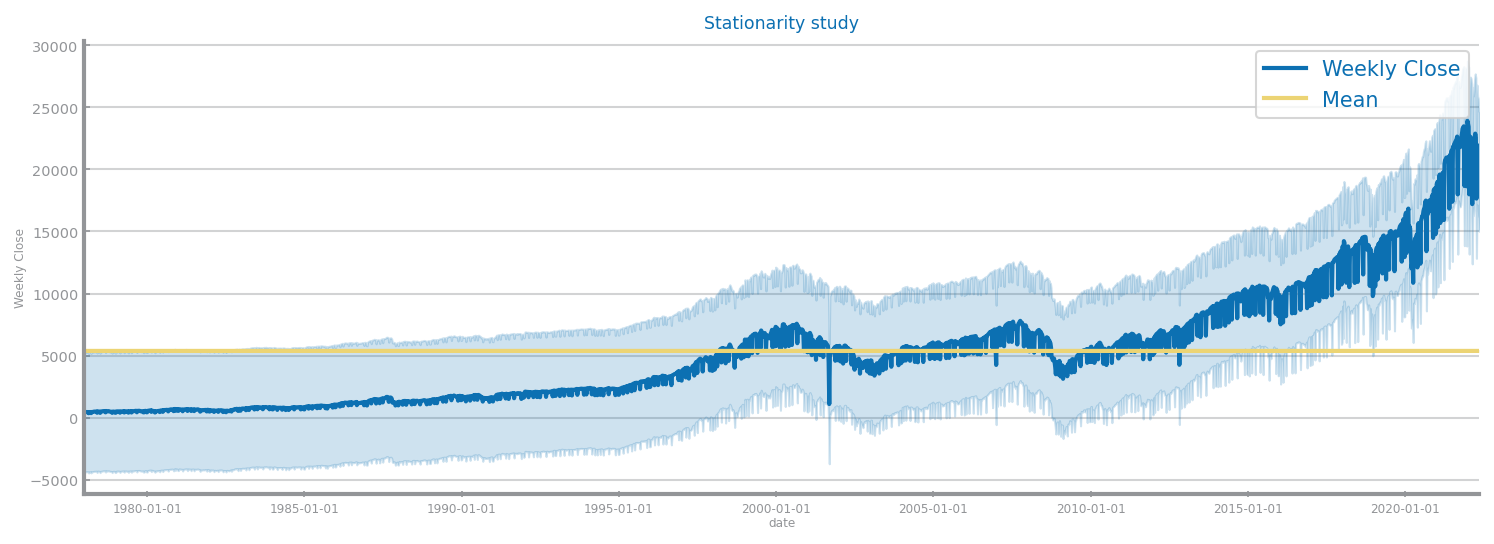

In [15]:
dt_w_series = Series(week_df[target])

mean_line = Series(ones(len(dt_w_series.values)) * dt_w_series.mean(), index=dt_w_series.index)
series = {f'Weekly {target}': dt_w_series, 'Mean': mean_line}
plt.figure(figsize=(3*HEIGHT, HEIGHT))
plot_series(series, x_label='date', y_label=f'Weekly {target}', title='Stationarity study', show_std=True)
plt.show()

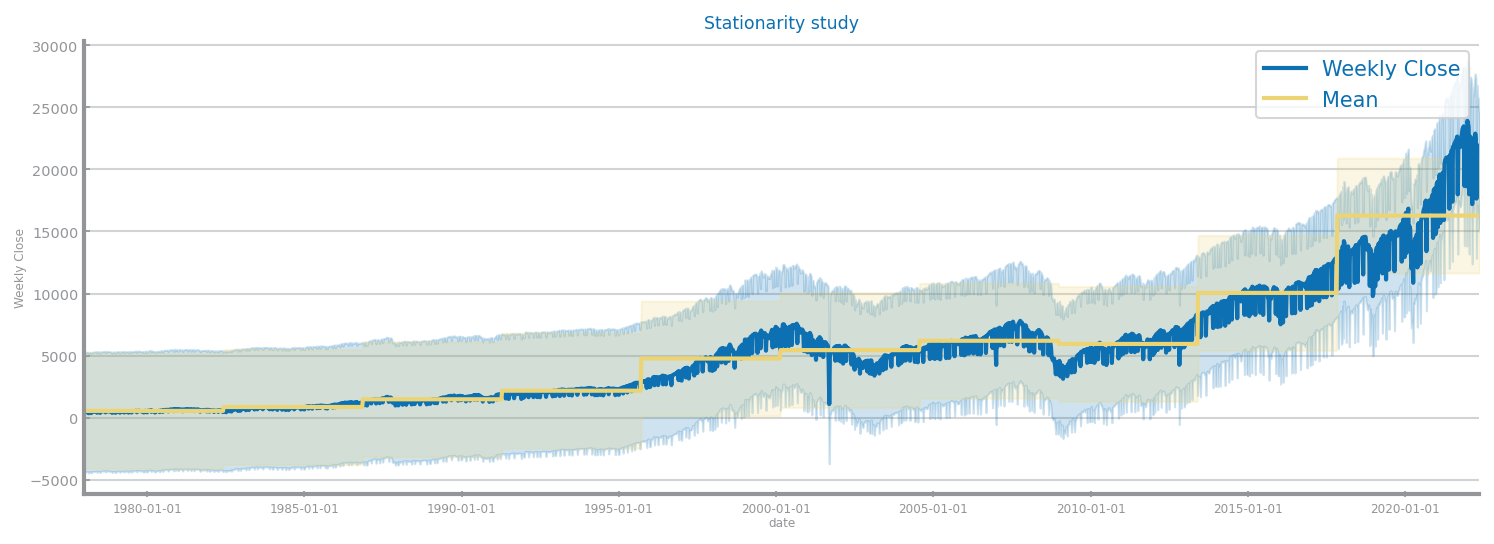

In [16]:
BINS = 10
line = []
n = len(dt_w_series)
for i in range(BINS):
    b = dt_w_series[i*n//BINS:(i+1)*n//BINS]
    mean = [b.mean()] * (n//BINS)
    line += mean
line += [line[-1]] * (n - len(line))
mean_line = Series(line, index=dt_w_series.index)
series = {f'Weekly {target}': dt_w_series, 'Mean': mean_line}
plt.figure(figsize=(3*HEIGHT, HEIGHT))
plot_series(series, x_label='date', y_label=f'Weekly {target}', title='Stationarity study', show_std=True)
plt.show()

##### Monthly data:

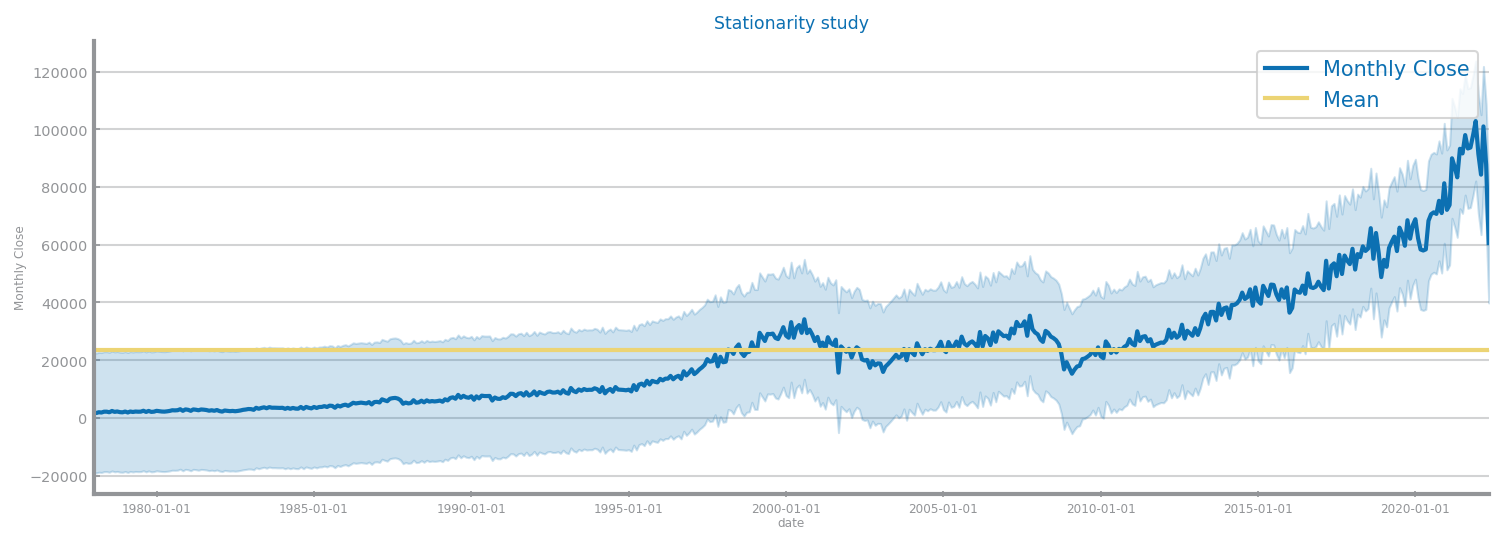

In [17]:
dt_m_series = Series(month_df[target])

mean_line = Series(ones(len(dt_m_series.values)) * dt_m_series.mean(), index=dt_m_series.index)
series = {f'Monthly {target}': dt_m_series, 'Mean': mean_line}
plt.figure(figsize=(3*HEIGHT, HEIGHT))
plot_series(series, x_label='date', y_label=f'Monthly {target}', title='Stationarity study', show_std=True)
plt.show()

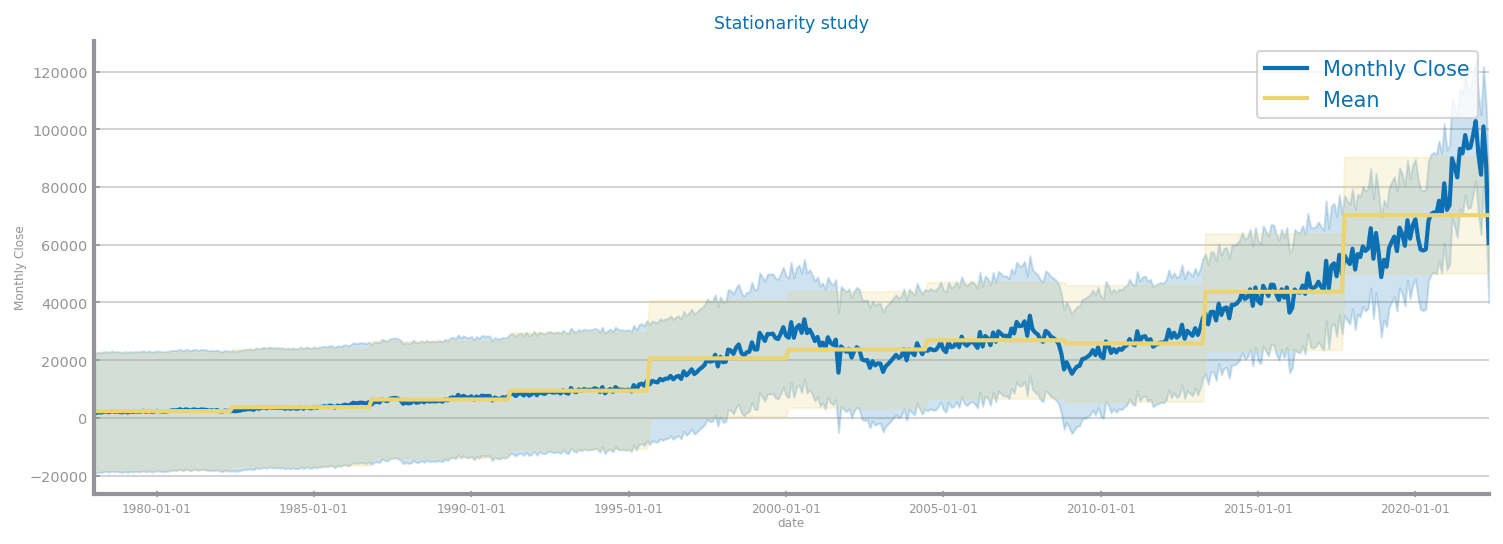

In [18]:
BINS = 10
line = []
n = len(dt_m_series)
for i in range(BINS):
    b = dt_m_series[i*n//BINS:(i+1)*n//BINS]
    mean = [b.mean()] * (n//BINS)
    line += mean
line += [line[-1]] * (n - len(line))
mean_line = Series(line, index=dt_m_series.index)
series = {f'Monthly {target}': dt_m_series, 'Mean': mean_line}
plt.figure(figsize=(3*HEIGHT, HEIGHT))
plot_series(series, x_label='date', y_label=f'Monthly {target}', title='Stationarity study', show_std=True)
plt.show()

##### Quarterly data:

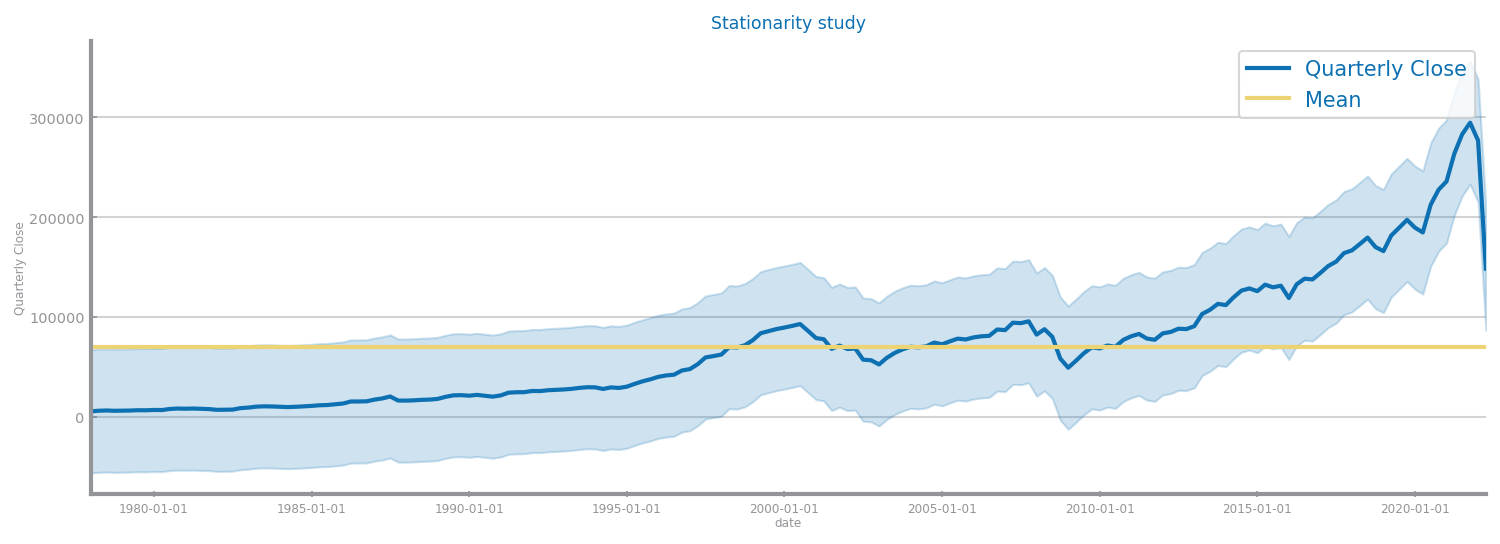

In [19]:
dt_q_series = Series(quarter_df[target])

mean_line = Series(ones(len(dt_q_series.values)) * dt_q_series.mean(), index=dt_q_series.index)
series = {f'Quarterly {target}': dt_q_series, 'Mean': mean_line}
plt.figure(figsize=(3*HEIGHT, HEIGHT))
plot_series(series, x_label='date', y_label=f'Quarterly {target}', title='Stationarity study', show_std=True)
plt.show()

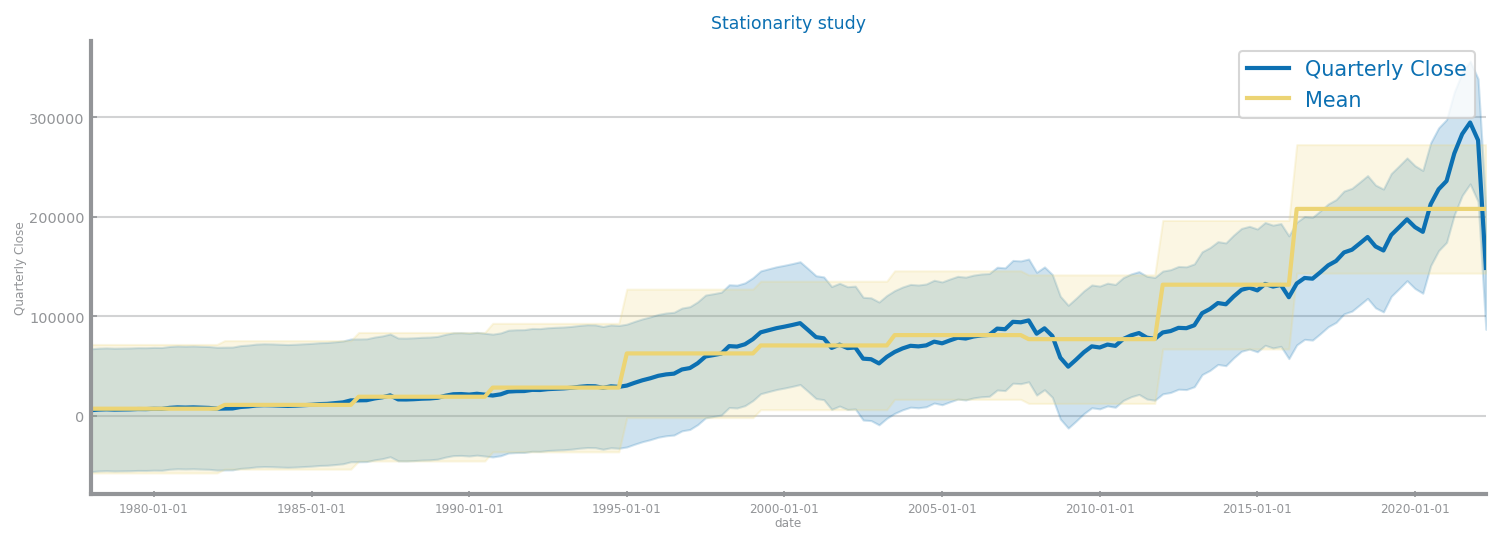

In [20]:
BINS = 10
line = []
n = len(dt_q_series)
for i in range(BINS):
    b = dt_q_series[i*n//BINS:(i+1)*n//BINS]
    mean = [b.mean()] * (n//BINS)
    line += mean
line += [line[-1]] * (n - len(line))
mean_line = Series(line, index=dt_q_series.index)
series = {f'Quarterly {target}': dt_q_series, 'Mean': mean_line}
plt.figure(figsize=(3*HEIGHT, HEIGHT))
plot_series(series, x_label='date', y_label=f'Quarterly {target}', title='Stationarity study', show_std=True)
plt.show()